# Regression Seminar - Hiva Moghaddam and Wibecka Oliver

Machine Learning DA380A HT23

#### Step One: Analyze the Data 

In [1]:
#Create needed imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import and read the csv file 
df = pd.read_csv("/Users/veetheviking/Desktop/Ed/Machine_Learning/Data_Sets/Used german cars.csv",  delimiter=';')
df.head(9)

,Make,Model,Build Year,Engine Size,Transmission,Mileage [km],Fuel,Fuel efficiency,Price [EUR]
0,Audi,A1,2017,1.4,Manual,25318,Petrol,55.4,12500
1,Audi,A6,2016,2.0,Automatic,58251,Diesel,64.2,16500
2,Audi,A1,2016,1.4,Manual,48183,Petrol,55.4,11000
3,Audi,A4,2017,2.0,Automatic,41757,Diesel,67.3,16800
4,Audi,A3,2019,1.0,Manual,3215,Petrol,49.6,17300
5,Audi,A1,2016,1.4,Automatic,51906,Petrol,58.9,13900
6,Audi,A6,2016,2.0,Automatic,123552,Diesel,61.4,13250
7,Audi,A4,2016,2.0,Manual,120973,Diesel,70.6,11750
8,Audi,A3,2015,1.4,Manual,74194,Petrol,60.1,10200


In [3]:
df.info

<bound method DataFrame.info of            Make      Model  Build Year  Engine Size Transmission  \
0          Audi         A1        2017          1.4       Manual   
1          Audi         A6        2016          2.0    Automatic   
2          Audi         A1        2016          1.4       Manual   
3          Audi         A4        2017          2.0    Automatic   
4          Audi         A3        2019          1.0       Manual   
...         ...        ...         ...          ...          ...   
34563  Mercedes    C Class        2020          2.0    Automatic   
34564  Mercedes    B Class        2020          2.0    Automatic   
34565  Mercedes  GLC Class        2019          2.1    Automatic   
34566  Mercedes  CLS Class        2019          2.0    Automatic   
34567  Mercedes    S Class        2019          2.9    Automatic   

       Mileage [km]    Fuel  Fuel efficiency  Price [EUR]  
0             25318  Petrol             55.4        12500  
1             58251  Diesel    

In [4]:
df.describe()

,Build Year,Engine Size,Mileage [km],Fuel efficiency,Price [EUR]
count,34568.000000,34568.000000,34568.000000,34568.000000,34568.000000
mean,2017.168132,2.058086,38525.910553,54.190063,23529.611490
std,2.249212,0.583447,37401.207586,21.245980,11706.977313
min,1970.000000,0.000000,2.000000,1.100000,650.000000
25%,2016.000000,1.600000,9441.750000,44.100000,15990.000000
50%,2017.000000,2.000000,27622.500000,52.300000,21000.000000
75%,2019.000000,2.100000,56315.000000,62.800000,28298.000000
max,2020.000000,6.600000,519707.000000,470.800000,159999.000000


In [5]:
#check for missing values
df.isna().sum()

Make               0
Model              0
Build Year         0
Engine Size        0
Transmission       0
Mileage [km]       0
Fuel               0
Fuel efficiency    0
Price [EUR]        0
dtype: int64

In [6]:
for column in df.columns:
    data_type = df[column].dtype
    print(f"Column '{column}' has data type: {data_type}")

Column 'Make' has data type: object
Column 'Model' has data type: object
Column 'Build Year' has data type: int64
Column 'Engine Size' has data type: float64
Column 'Transmission' has data type: object
Column 'Mileage [km]' has data type: int64
Column 'Fuel' has data type: object
Column 'Fuel efficiency' has data type: float64
Column 'Price [EUR]' has data type: int64


There is no missing data, which means we do not need utilize imputation

#### Step Two: Plot the Data 

We plotted the numerical data first to get a feel for the data

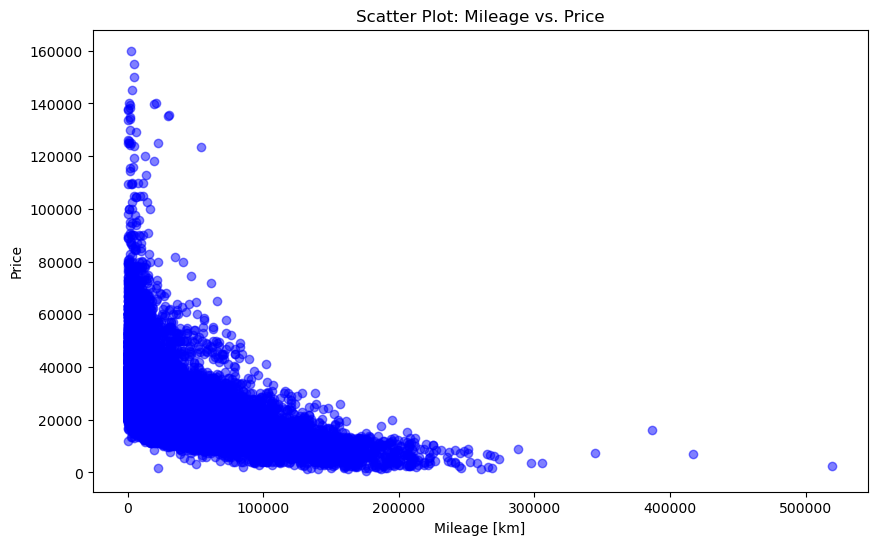

In [7]:
#Plot Milage vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Mileage [km]'], df['Price [EUR]'], alpha=0.5, color='blue')
plt.xlabel('Mileage [km]')
plt.ylabel('Price')
plt.title('Scatter Plot: Mileage vs. Price')
plt.show()


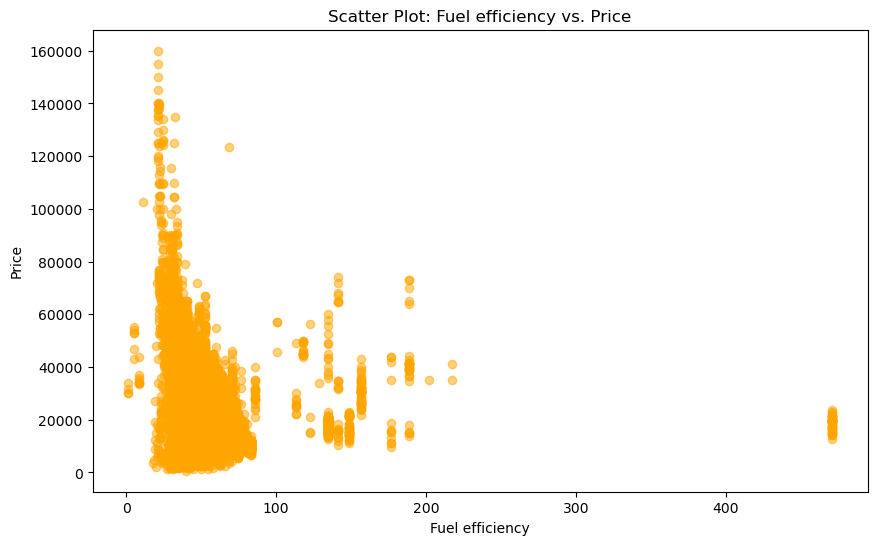

In [8]:
#Plot Fuel efficiency vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Fuel efficiency'], df['Price [EUR]'], alpha=0.5, color='orange')
plt.xlabel('Fuel efficiency')
plt.ylabel('Price')
plt.title('Scatter Plot: Fuel efficiency vs. Price')
plt.show()


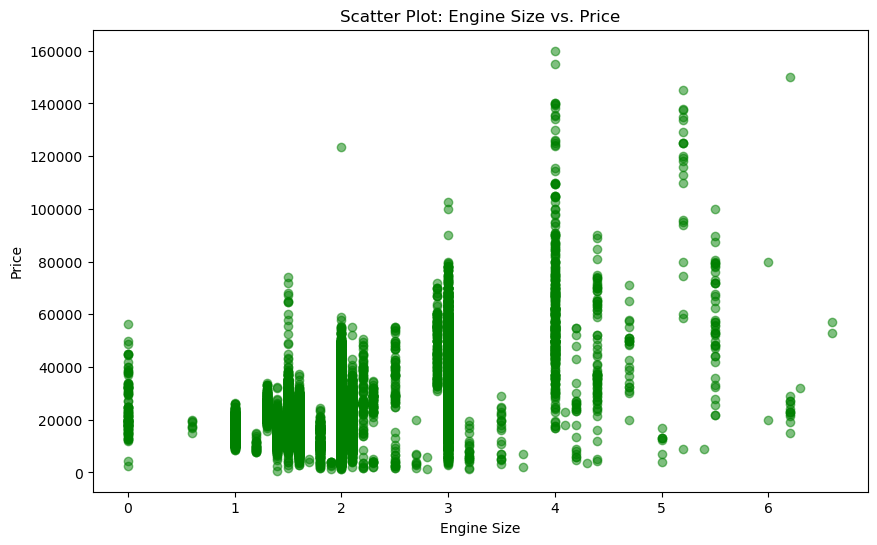

In [9]:
#Plot Engine Size vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Engine Size'], df['Price [EUR]'], alpha=0.5, color='green')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Scatter Plot: Engine Size vs. Price')
plt.show()

We then plot some of the catgorical data 

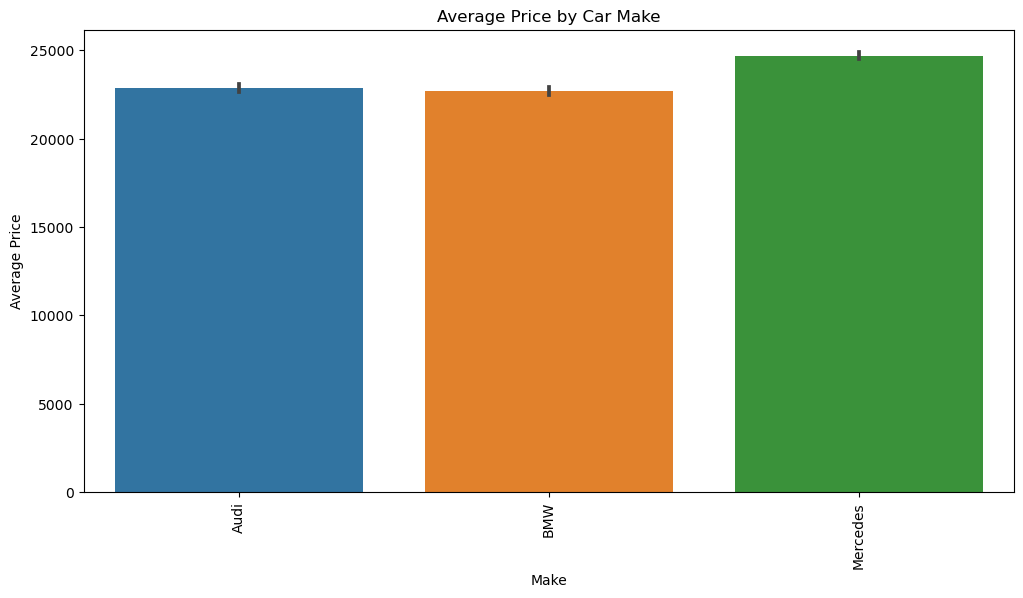

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Make', y='Price [EUR]')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Average Price')
plt.title('Average Price by Car Make')
plt.show()

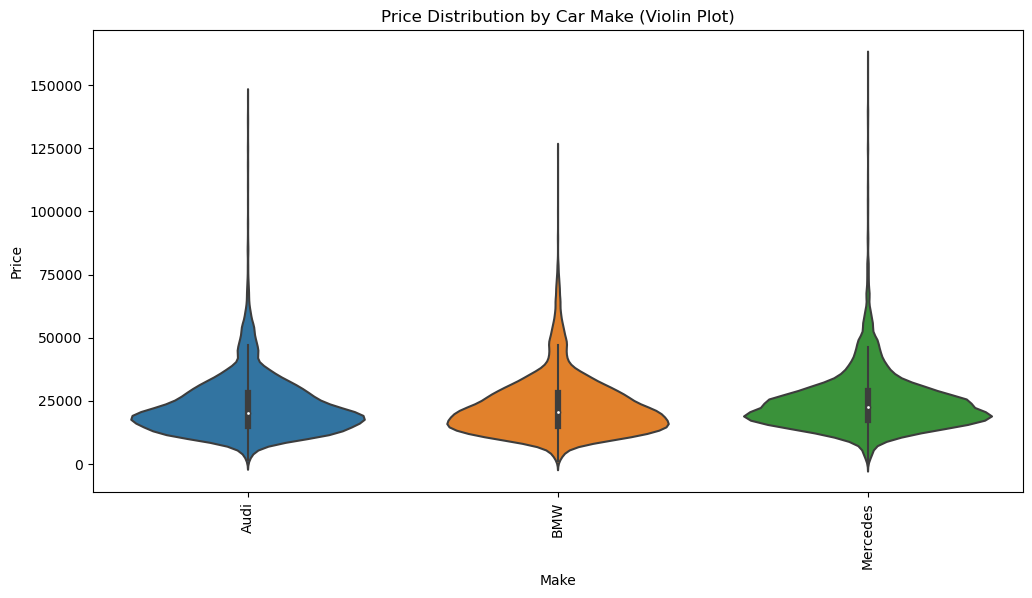

In [11]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Make', y='Price [EUR]')
plt.xticks(rotation=90)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Price Distribution by Car Make (Violin Plot)')
plt.show()

### Step Three: Prepare the Data 
We had no missing values, but we needed to encode the categorical values as well as split the data into training and test sets


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#encode the categorical data
df = pd.get_dummies(df, columns=['Make', 'Model', 'Transmission', 'Fuel'])

# Split the data into training and testing sets 80/20
X = df.drop('Price [EUR]', axis=1)
y = df['Price [EUR]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical attributes
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



### Step Four: Try Different Models

## KNN Regression Model 

Best k: 3
Lowest MAPE: 7.689079298278542%


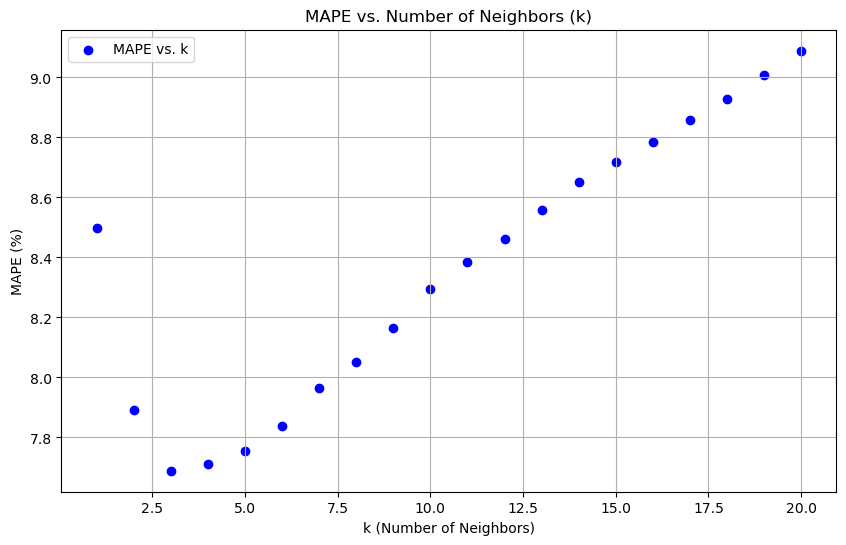

In [13]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


# Define a range of 'k' values for hyperparameter tuning
k_values = range(1, 21)

# Set variables to track best k and lowest MAPE
lowest_mape = float('inf')
best_k = None

# Lists to store MAPE and 'k' values
mape_values = []
k_candidates = []

# Loop through the 'k' values and calculate MAPE for each
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mape = mean_absolute_error(y_test, y_pred) / np.mean(y_test) * 100

    k_candidates.append(k)
    mape_values.append(mape)
    
    if mape < lowest_mape:
        lowest_mape = mape
        best_k = k
        
        
#print best k and lowest MAPE
print(f"Best k: {best_k}")
print(f"Lowest MAPE: {lowest_mape}%")

# Create a scatterplot to visualize the MAPE vs. 'k'
plt.figure(figsize=(10, 6))
plt.scatter(k_candidates, mape_values, c='blue', label='MAPE vs. k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('MAPE (%)')
plt.title('MAPE vs. Number of Neighbors (k)')
plt.legend()
plt.grid(True)
plt.show()


## Neural Network Model


In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Create a sequential model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers 
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer 
model.add(Dense(1, activation='linear'))

# Compile the model 
model.compile(loss='mean_absolute_error', optimizer='adam')

# Print the model summary
model.summary()

#verbose is set to zero to avoid printing out all 100 epochs 
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Get predictions on the test set
y_pred = model.predict(X_test)

# Convert y_test and y_pred to 1-dimensional arrays
y_test = y_test.ravel()
y_pred = y_pred.ravel()

# Calculate MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:}%")

2023-10-21 18:12:54.950949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-21 18:13:17.854258: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6016      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 8,641
Trainable params: 8,641
Non-trainable params: 0
_________________________________________________________________
217/217 [==============================] - 1s 2ms/step
Mean Absolute Percentage Error (MAPE): 8.03388990034254%


See if using a random search grid helps... 

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import tensorflow as tf 
from sklearn.metrics import make_scorer


# Define a function to create a regression model
def create_model(layers=2, units=32, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    
    for _ in range(layers):
        model.add(Dense(units, activation='relu'))
    
    model.add(Dense(1, activation='linear'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mean_absolute_error', optimizer=optimizer)
    return model

# Create a KerasRegressor model
model = KerasRegressor(build_fn=create_model, verbose=1)

# Define hyperparameter grid for random search
param_dist = {
    'layers': [1, 2, 3],
    'units': [16, 32, 64, 128],
    'learning_rate': [0.01, 0.001, 0.0001],
    'batch_size': [16, 32, 64, 128]
}

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Create the RandomizedSearchCV 
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=3,  # Number of cross-validation folds
    scoring=mape_scorer,  # Use the custom MAPE scorer
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the model to the data
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate MAE and MAPE
mae = mean_absolute_error(y_test, y_pred)

def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_test, y_pred)

print(f"Mean Absolute Percentage Error (MAPE): {mape:}%")


/var/folders/c7/67qwkpjd19vd432yzm3kgbxc0000gn/T/ipykernel_51708/2813420534.py:22: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=1)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
109/109 [==============================] - 0s 1ms/step
Mean Absolute Percentage Error (MAPE): 9.857329030589296%


## Support Vector Regression 


Mean Absolute Percentage Error (MAPE): 36.32257255366534%


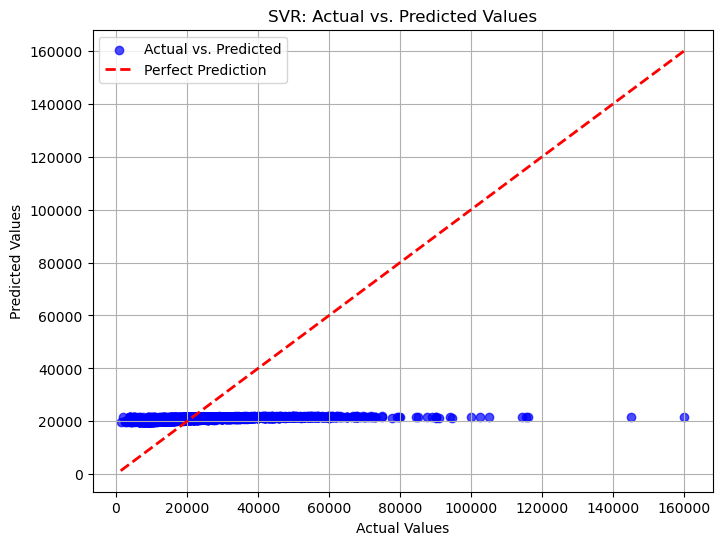

In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
#We first tried to use gridsearch but it took too much CPU and we gave up after 10 mins. 
# Create an SVR model with default hyperparameters, just to see how well this model does as default
svm_regressor = SVR()

# Fit the model to your training data
svm_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape:}%")

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', label='Actual vs. Predicted', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('SVR: Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()